<a id="0"></a>

# **S4E9: Used Car Price Regression (NN)**

Table of Contents:
* [About the Project](#1)
* [About the Data](#2)
* [Set Up](#3)
* [Exploring the Datasets](#4)
    - [Train Dataset](#4a)
    - [Test Dataset](#4b)
    - [Original Dataset](#4c)
* [Data Cleaning](#5)
    - [Concatenating Datasets](#5a)
    - [Missing Values: 'fuel_type'](#5b)
    - [Missing Values: 'clean_title' & 'accident'](#5c)
* [Data Preprocessing](#6)
* [Building the Neural Network](#7)
* [Making Predictions](#8)
* [Conclusion](#c)
* [References](#r)

<a id="1"></a>

# **About the Project**

This project has been completed as part of Kaggle's [Regression of Used Car Prices](https://www.kaggle.com/competitions/playground-series-s4e9/overview) competition (S4E9). Furthermore, this project presents an opportunity to practice both data cleaning and the development of neural networks. The overall goal here is to develop a neural network model which will predict the price of a car based upon its predictor variables. This will be accomplished by first determining an efficient method of dealing with missing data. Following this, a neural network will be built and evaluated by the root mean squared error (RMSE) of the predicted car prices compared to the actual car prices. 

<a id="0"></a>

<a href="#0" style="background-color:blue; color:white; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="0"></a>

<a id="0"></a>

<a href="#3" style="background-color:blue; color:white; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Next Section</a><a id="0"></a>

<a id="2"></a>

# **About the Data**

Two of the datasets used in this project were made available by Kaggle, i.e. the train and test sets. These sets were generated from a deep learning model trained on the [Used Car Price Prediction Dataset](https://www.kaggle.com/datasets/taeefnajib/used-car-price-prediction-dataset). To enhance the amount of data used for model training, I have also included the original dataset in this project. The Kaggle train dataset contains 188533 rows and 13 columns of data. The Kaggle test dataset contains 125690 rows and 12 columns of data. The original dataset contains 4009 rows and 12 columns of data.

Target Variable:
- Price (dollars)

Predictor Variables:
- Brand ---> the brand or company name of the vehicle
- Model ---> the specific model of the vehicle
- Model Year ---> the year the vehicle was manufactured
- Milage ---> the milage of the vehicle
- Fuel Type ---> the type of fuel the vehicle uses (ex: gasoline, diesel, hybrid)
- Engine ---> the specifications of the engine
- Transmission ---> the type of transmission (ex: manual, automatic)
- Ext Col ---> the exterior color of the vehicle
- Int Col ---> the interior color of the vehicle
- Accident ---> whether the vehicle has a prior history of accidents or damage
- Clean Title ---> whether the vehicle has a clean title

<a id="0"></a>

<a href="#0" style="background-color:blue; color:white; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="0"></a>

<a id="0"></a>

<a href="#4" style="background-color:blue; color:white; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Next Section</a><a id="0"></a>

<a id="3"></a>

# **Set Up**

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [2]:
# Loading in the Kaggle datasets
train_df = pd.read_csv('/kaggle/input/playground-series-s4e9/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s4e9/test.csv')

In [3]:
# Loading in the original dataset
original_df = pd.read_csv('/kaggle/input/used-car-price-prediction-dataset/used_cars.csv')

<a id="0"></a>

<a href="#0" style="background-color:blue; color:white; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="0"></a>

<a id="0"></a>

<a href="#5" style="background-color:blue; color:white; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Next Section</a><a id="0"></a>

<a id="4"></a>

# **Exploring the Datasets**

This section briefly explores the general structure of the two Kaggle datasets ('train_df' & 'test_df') and the original dataset ('original_df'). The objective here is to simply become familiar with the content in these datasets. Most importantly, this section identifies any missing values, which will be remedied in the following section 'Data Cleaning'. 

<a id="4a"></a>

## **Viewing the 'train_df' dataset**

In [4]:
# Checking the first 5 entries in 'train_df'
train_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [5]:
# Viewing basic info of 'train_df'
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [6]:
# Generating descriptive statistics of 'train_df'
train_df.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [7]:
# Creating a function to show summary statistics of a given dataset
def show_stats(dataset):
    stats_df = pd.DataFrame(index = list(dataset))
    stats_df['Dtype'] = dataset.dtypes
    stats_df['Count'] = dataset.count()
    stats_df['#Unique'] = dataset.nunique()
    stats_df['%Unique'] = stats_df['#Unique'] / len(dataset) * 100
    stats_df['#Null'] = dataset.isnull().sum()
    stats_df['%Null'] = stats_df['#Null'] / len(dataset) * 100
    print(stats_df)

In [8]:
# Getting more summary statistics of the 'train_df' dataset
show_stats(train_df)

               Dtype   Count  #Unique     %Unique  #Null      %Null
id             int64  188533   188533  100.000000      0   0.000000
brand         object  188533       57    0.030233      0   0.000000
model         object  188533     1897    1.006190      0   0.000000
model_year     int64  188533       34    0.018034      0   0.000000
milage         int64  188533     6651    3.527764      0   0.000000
fuel_type     object  183450        7    0.003713   5083   2.696080
engine        object  188533     1117    0.592469      0   0.000000
transmission  object  188533       52    0.027581      0   0.000000
ext_col       object  188533      319    0.169201      0   0.000000
int_col       object  188533      156    0.082744      0   0.000000
accident      object  186081        2    0.001061   2452   1.300568
clean_title   object  167114        1    0.000530  21419  11.360876
price          int64  188533     1569    0.832215      0   0.000000


By viewing the 'train_df' dataset, we can see that three columns have missing entries. These columns are 'fuel_type', 'accident', and 'clean_title'. These columns will need to be cleaned up, by either simply dropping particular rows of data, or by manually filling them in with synthetic data. 

We can also see that many of the object type columns have a large number of unique entries. For example, the 'model' column has 1897 unique values. This means that there are almost 2000 unique car brands! Columns like these may need to be simplified by assigning and grouping these unique values into more comprehensible categories. 

<a id="4b"></a>

## **Viewing the 'test_df' dataset**

In [9]:
# Viewing the first 5 entries of 'test_df'
test_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [10]:
# Viewing basic info of 'test_df'
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            125690 non-null  int64 
 1   brand         125690 non-null  object
 2   model         125690 non-null  object
 3   model_year    125690 non-null  int64 
 4   milage        125690 non-null  int64 
 5   fuel_type     122307 non-null  object
 6   engine        125690 non-null  object
 7   transmission  125690 non-null  object
 8   ext_col       125690 non-null  object
 9   int_col       125690 non-null  object
 10  accident      124058 non-null  object
 11  clean_title   111451 non-null  object
dtypes: int64(3), object(9)
memory usage: 11.5+ MB


In [11]:
# Generating descriptive statistics of 'test_df'
test_df.describe()

,id,model_year,milage
count,125690.000000,125690.000000,125690.000000
mean,251377.500000,2015.797526,66042.581510
std,36283.722005,5.673797,50223.858435
min,188533.000000,1974.000000,100.000000
25%,219955.250000,2013.000000,24500.000000
50%,251377.500000,2017.000000,57500.000000
75%,282799.750000,2020.000000,95798.000000
max,314222.000000,2024.000000,405000.000000


In [12]:
# Getting more summary stats of 'test_df'
show_stats(test_df)

               Dtype   Count  #Unique     %Unique  #Null      %Null
id             int64  125690   125690  100.000000      0   0.000000
brand         object  125690       55    0.043758      0   0.000000
model         object  125690     1891    1.504495      0   0.000000
model_year     int64  125690       36    0.028642      0   0.000000
milage         int64  125690     5700    4.534967      0   0.000000
fuel_type     object  122307        7    0.005569   3383   2.691543
engine        object  125690     1117    0.888694      0   0.000000
transmission  object  125690       52    0.041372      0   0.000000
ext_col       object  125690      317    0.252208      0   0.000000
int_col       object  125690      156    0.124115      0   0.000000
accident      object  124058        2    0.001591   1632   1.298433
clean_title   object  111451        1    0.000796  14239  11.328666


The 'test_df' dataset shares an almost identical structure to that of the 'train_df' dataset. This is to be expected, as the 'test_df' dataset will be used to make predictions on the target variable 'price'. The key difference here is that 'test_df' does not contain the target variable 'price'. 

<a id="4c"></a>

## **Viewing the 'original' dataset**

In [13]:
# Viewing the first 5 entries in 'original_df'
original_df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [14]:
# Getting basic info of 'original_df'
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [15]:
# Getting more stats of 'original_df'
show_stats(original_df)

               Dtype  Count  #Unique    %Unique  #Null      %Null
brand         object   4009       57   1.421801      0   0.000000
model         object   4009     1898  47.343477      0   0.000000
model_year     int64   4009       34   0.848092      0   0.000000
milage        object   4009     2818  70.291843      0   0.000000
fuel_type     object   3839        7   0.174607    170   4.240459
engine        object   4009     1146  28.585682      0   0.000000
transmission  object   4009       62   1.546520      0   0.000000
ext_col       object   4009      319   7.957097      0   0.000000
int_col       object   4009      156   3.891245      0   0.000000
accident      object   3896        2   0.049888    113   2.818658
clean_title   object   3413        1   0.024944    596  14.866550
price         object   4009     1569  39.136942      0   0.000000


Overall, the 'original_df' dataset shares the same structure as the 'train_df' dataset. This is to be expected, as 'train_df' was generated from 'original_df'. The key differences here are that 'original_df' contains no 'id' column and has far fewer entries of data. More specifically, 'train_df' has 188533 entries (rows) of data while 'original_df' has only 4009. Also, it should be noted that the 'milage' and 'price' columns are object type. This is because they contain unnecessary elements, such as a dollar sign and 'mi.'. These will have to be removed in order to convert these columns into int. 

The 'original_df' dataset also has missing values in the same columns as 'train_df'. In the next section, these datasets will be concatenated and cleaned simultaneously. 

<a id="0"></a>

<a href="#0" style="background-color:blue; color:white; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="0"></a>

<a id="0"></a>

<a href="#6" style="background-color:blue; color:white; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Next Section</a><a id="0"></a>

<a id="5"></a>

# **Data Cleaning**

Objectives:
- Remove unnecessary elements from 'price' and 'milage' columns in 'original_df'
- Combine 'train_df' and 'original_df' datasets
- Resolve missing values for 'fuel_type' 
- Resolve missing titles for 'accident'
- Resolve missing values for 'clean_title'

<a id="5a"></a>

## **Concatenating Datasets**

In [16]:
# Removing '$' from 'price' column in 'original_df'
# Converting 'price' column to int
original_df['price'] = original_df['price'].str.replace('\W', '', regex=True).astype(int)

# Removing 'mi.' from 'milage' column
# Converting 'milage' column to int
original_df['milage'] = original_df['milage'].str.replace(r'\D', '', regex=True).astype(int)

In [17]:
# Concatenating 'train_df' and 'original_df' datasets to increase size of data
# Also removing 'id' column from the dataset
train = pd.concat([train_df, original_df]).drop(['id'], axis=1).drop_duplicates()

In [18]:
# Getting info on new 'train' dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192542 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         192542 non-null  object
 1   model         192542 non-null  object
 2   model_year    192542 non-null  int64 
 3   milage        192542 non-null  int64 
 4   fuel_type     187289 non-null  object
 5   engine        192542 non-null  object
 6   transmission  192542 non-null  object
 7   ext_col       192542 non-null  object
 8   int_col       192542 non-null  object
 9   accident      189977 non-null  object
 10  clean_title   170527 non-null  object
 11  price         192542 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 19.1+ MB


<a id="5b"></a>

## **Missing Values: 'fuel_type'**

In [19]:
# Reviewing number of missing values for 'fuel_type' in combined dataset 'train'
print("Missing 'fuel_type' values in 'train':", train.fuel_type.isna().sum())

Missing 'fuel_type' values in 'train': 5253


In [20]:
# Verifying number of unique values (categories) in 'fuel_type'
train.fuel_type.value_counts()

fuel_type
Gasoline          169249
Hybrid              7026
E85 Flex Fuel       5545
Diesel              4071
–                    826
Plug-In Hybrid       555
not supported         17
Name: count, dtype: int64

Above, we can see the 7 unique values (and their counts) in the 'fuel_type' column. What immediately stands out are the '-' and 'not supported' values. 

In [21]:
# Examining examples of entries where 'fuel_type' is '–'
train[train['fuel_type']=='–']

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
532,Dodge,Challenger R/T Scat Pack,2021,35000,–,–,8-Speed A/T,Blue,Gray,None reported,Yes,48000
1155,Ford,Mustang GT Premium,2017,143600,–,–,6-Speed M/T,White,Black,At least 1 accident or damage reported,Yes,31000
1307,Toyota,Land Cruiser Base,1994,138033,–,–,A/T,Green,Beige,None reported,Yes,11999
1362,Ford,Mustang EcoBoost Premium,2016,43000,–,–,A/T,Blue,Black,None reported,Yes,15500
1741,Chevrolet,Protege DX,1993,94200,–,–,A/T,Red,Gray,None reported,Yes,7599
...,...,...,...,...,...,...,...,...,...,...,...,...
3702,GMC,Sierra 1500 SLE1 Extended Cab,2008,187000,–,–,4-Speed A/T,Red,Gray,At least 1 accident or damage reported,Yes,6100
3918,Porsche,911 Carrera Cabriolet,1996,38000,–,–,Transmission w/Dual Shift Mode,Blue,Gray,NaN,NaN,75000
3922,Mazda,Protege DX,1993,94200,–,–,A/T,Gray,–,At least 1 accident or damage reported,Yes,2500
3952,Dodge,Ram 3500 Quad Cab DRW,2000,188000,–,–,A/T,Silver,Gray,At least 1 accident or damage reported,Yes,10000


Above, we can see several examples of where 'fuel_type' is '–'. Here, we can see that the 'engine' column also contains '–'. Before we go ahead and remove these rows, it would be wise to confirm whether or not all 826 rows contain a '–' in the 'engine' column.

In [22]:
# Examining rows where 'fuel_type' is '–' but 'engine' is NOT '–'
train[(train['fuel_type']=='–') & (train['engine']!='–')]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
2138,Saturn,Sky Base,2008,125800,–,140.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,9950
2741,Bentley,Continental GT W12,2022,13232,–,582.0HP 6.0L 12 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,None reported,Yes,52000
8607,Ford,Excursion XLT 4WD,2000,93000,–,310.0HP 6.8L 10 Cylinder Engine Gasoline Fuel,A/T,Silver,Black,At least 1 accident or damage reported,Yes,28500
15550,RAM,1500 Rebel,2018,11000,–,395.0HP 5.7L 8 Cylinder Engine Gasoline/Mild E...,A/T,White,Black,None reported,Yes,105000
23676,Nissan,Juke SL,2019,46000,–,188.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,CVT Transmission,White,Gray,At least 1 accident or damage reported,Yes,59000
105015,Toyota,Tacoma TRD Pro,2018,31678,–,3.5 Liter,Automatic,Midnight Black Metallic,Graphite w/Gun Metal,None reported,NaN,40998
112813,RAM,1500 Classic Tradesman,2017,133338,–,3.6L V6 24V MPFI DOHC,8-Speed Automatic,Ruby Flare Pearl,Black,At least 1 accident or damage reported,Yes,45999
128224,BMW,M3 Base,2008,58000,–,333.0HP 3.2L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,White,Black,At least 1 accident or damage reported,Yes,41500
187495,Nissan,Pathfinder SL,2014,87305,–,284.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Brown,Gray,At least 1 accident or damage reported,Yes,10000


Above, we find that 9 of the 826 rows do actually have some entries in the 'engine' column. With some basic inference, we can determine that the 'fuel_type' for these entries should probably be 'Gasoline'. The next line of code will work to fill in these values. 

In [23]:
# Replacing 'fuel_type' with 'Gasoline' where 'fuel_type' is '–' and 'engine' is NOT '–'
train.loc[(train['fuel_type']=='–') & (train['engine']!='–'),'fuel_type'] = 'Gasoline' 

In [24]:
# Dropping remaining rows where 'fuel_type' is '–'
train = train[~train['fuel_type'].isin(['–'])]
train.reset_index(drop=True, inplace=True)

In [25]:
# Verifying changes to 'train'
# Note: there should no longer be any entries with '–'
train.fuel_type.value_counts()

fuel_type
Gasoline          169258
Hybrid              7026
E85 Flex Fuel       5545
Diesel              4071
Plug-In Hybrid       555
not supported         17
Name: count, dtype: int64

In [26]:
# Examining cases where 'fuel_type' is 'not supported'
train[train['fuel_type']=='not supported']

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
4808,Chevrolet,Suburban LT,2011,109646,not supported,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,6-Speed A/T,Black,Beige,None reported,Yes,18998
17940,Porsche,Camaro 2SS,2015,67000,not supported,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,11500
19117,Nissan,Mirai Limited,2000,131000,not supported,182.0HP Electric Motor Hydrogen Fuel,A/T,Silver,Black,None reported,Yes,5000
27101,Subaru,Outback 2.5i Limited,2017,116000,not supported,175.0HP 2.5L 4 Cylinder Engine Gasoline Fuel,CVT Transmission,Gray,Black,At least 1 accident or damage reported,Yes,27499
32915,Nissan,Mirai Limited,2009,137333,not supported,182.0HP Electric Motor Hydrogen Fuel,A/T,White,Gray,At least 1 accident or damage reported,Yes,12999
60475,Chevrolet,Silverado 1500 RST,2020,19200,not supported,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,10-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,58000
73802,Toyota,Mirai Limited,2021,79876,not supported,182.0HP Electric Motor Hydrogen Fuel,A/T,Red,Black,None reported,Yes,15000
86548,Lexus,IS 350 F Sport,2022,9500,not supported,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes,60000
94047,Porsche,Cayenne Turbo GT,2018,52000,not supported,550.0HP 4.8L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Gray,Gray,At least 1 accident or damage reported,Yes,35000
126552,Toyota,Mirai Limited,2016,58664,not supported,151.0HP Electric Motor Hydrogen Fuel,CVT Transmission,Black,Black,At least 1 accident or damage reported,Yes,22500


Above, we can see the rows where 'fuel_type' is 'not supported'. We can argue that some of these should be 'Gasoline' where the 'engine' column contains any mention of a gasoline/cylinder engine, e.g. "311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel". In contrast, the other rows where the 'engine' column mentions hydrogen fuel should be classified as 'Hybrid'. These rows will be assigned accordingly in the next line of code.

In [27]:
# Replacing 'not supported' with 'Gasoline' where 'engine' column contains 'Cylinder'
train.loc[(train['fuel_type']=='not supported') & (train['engine'].str.contains('Cylinder', case=False, na=False)), 'fuel_type'] = 'Gasoline'

# Replacing 'not supported' with 'Hybrid' where 'engine' columns contains 'Hydrogen'
train.loc[(train['fuel_type']=='not supported') & (train['engine'].str.contains('Hydrogen', case=False, na=False)), 'fuel_type'] = 'Hybrid'

In [28]:
# Verifying changes to 'train'
# Note: there should no longer be any entries with 'not supported'
train.fuel_type.value_counts()

fuel_type
Gasoline          169267
Hybrid              7034
E85 Flex Fuel       5545
Diesel              4071
Plug-In Hybrid       555
Name: count, dtype: int64

We have now corrected the rows where 'fuel_type' was either '–' or 'not supported'. However, we still need to deal with the 5253 missing values. The code chunk below has been adapted from a great piece of work by Wissam Elias & Ismail Alshofi (listed in the References section). This code assigns the likely correct fuel types based upon either the 'engine', 'brand', or 'model' columns containing particular strings. For example, we can fill in missing values for 'fuel_type' as 'Flex' where the 'engine' column contains the string 'Flex'. Or we can assign the 'fuel_type' as 'Hybrid' where the 'model' column contains the string 'Hybrid'. The process is similar to the steps that I have taken above.   

In [29]:
# Kudos to Wissam Elias & Ismail Alshofi for this adapted code! 

# Assigning 'fuel_type' as 'E85 Flex Fuel' where 'engine' column contains 'Flex'
train.loc[(train['fuel_type'].isna()) & (train['engine'].str.contains("Flex", case=False, na=False)), 'fuel_type'] = 'E85 Flex Fuel'

# Assigning as 'Hybrid' where 'engine' contains 'Dual', 'Electric', 'Battery', 'kW', 'AH'
# Also where 'brand' contains 'Tesla' & where 'model' contains 'Hybrid'
train.loc[(train['fuel_type'].isna()) & (train['engine'].str.contains("Dual", case=False, na=False)), 'fuel_type'] = 'Hybrid'
train.loc[(train['fuel_type'].isna()) & (train['engine'].str.contains("Electric", case=False, na=False)), 'fuel_type'] = 'Hybrid'
train.loc[(train['fuel_type'].isna()) & (train['engine'].str.contains("Battery", case=False, na=False)), 'fuel_type'] = 'Hybrid'
train.loc[(train['fuel_type'].isna()) & (train['engine'].str.contains("kW", case=False, na=False)), 'fuel_type'] = 'Hybrid'
train.loc[(train['fuel_type'].isna()) & (train['engine'].str.contains("AH", case=False, na=False)), 'fuel_type'] = 'Hybrid'
train.loc[(train['fuel_type'].isna()) & (train['brand'].str.contains("Tesla", case=False, na=False)), 'fuel_type'] = 'Hybrid'
train.loc[(train['fuel_type'].isna()) & (train['model'].str.contains("Hybrid", case=False, na=False)), 'fuel_type'] = 'Hybrid'

# Assigning as 'Gasoline' where 'engine' contains 'GDI', 'PDI', 'OHV', 'MPFI', 'TFSI', 'DOHC', 'Gasoline'
train.loc[(train['fuel_type'].isna()) & (train['engine'].str.contains("GDI", case=False, na=False)), 'fuel_type'] = 'Gasoline'
train.loc[(train['fuel_type'].isna()) & (train['engine'].str.contains("PDI", case=False, na=False)), 'fuel_type'] = 'Gasoline'
train.loc[(train['fuel_type'].isna()) & (train['engine'].str.contains("OHV", case=False, na=False)), 'fuel_type'] = 'Gasoline'
train.loc[(train['fuel_type'].isna()) & (train['engine'].str.contains("MPFI", case=False, na=False)), 'fuel_type'] = 'Gasoline'
train.loc[(train['fuel_type'].isna()) & (train['engine'].str.contains("TFSI", case=False, na=False)), 'fuel_type'] = 'Gasoline'
train.loc[(train['fuel_type'].isna()) & (train['engine'].str.contains("DOHC", case=False, na=False)), 'fuel_type'] = 'Gasoline'
train.loc[(train['fuel_type'].isna()) & (train['engine'].str.contains("Gasoline", case=False, na=False)), 'fuel_type'] = 'Gasoline'
train.loc[(train['fuel_type'].isna()) & (train['model_year'] < 2020), 'fuel_type'] = 'Gasoline'

# Assigning as 'Diesel' where 'engine' contains 'Diesel'
train.loc[(train['fuel_type'].isna()) & (train['engine'].str.contains("Diesel", case=False, na=False)), 'fuel_type'] = 'Diesel'

In [30]:
# Verifying changes and identifying any remaining missing values
train[train['fuel_type'].isna()]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
19800,Nissan,Titan SV,2023,4451,NaN,5.3 Liter,Automatic,Anthracite Blue Metallic,Black,None reported,NaN,96998
34994,Rivian,R1S Adventure Package,2023,15097,NaN,5.5 Liter,Automatic,White,Black,None reported,NaN,58900
43132,Audi,Q4 e-tron Sportback Premium,2021,13613,NaN,2.0 Liter Turbo,Automatic,Navarra Blue Metallic,Black,None reported,NaN,38998
47854,Mercedes-Benz,EQS 450 4MATIC,2022,20104,NaN,4.0 Liter Twin Turbo,Automatic,–,–,None reported,NaN,94998
55614,Land,Rover Range Rover Velar SVAutobiography Dynami...,2021,16184,NaN,V8,Automatic,Fuji White,Black,None reported,NaN,58598
149820,Jaguar,F-PACE S,2022,11111,NaN,3.0 Liter,Automatic,Santorini Black Metallic,Ebony / Pimento,None reported,NaN,81900
180883,Mercedes-Benz,S-Class S 560 4MATIC,2020,4665,NaN,4.0 Liter,Automatic,Black,Black,None reported,NaN,40798


In [31]:
# Assigning fuel types to remaining outliers
train.loc[(train['fuel_type'].isna()) & (train['brand'].str.contains("Nissan", case=False, na=False)) & (train['model'].str.contains('Titan', case=False, na=False)), 'fuel_type'] = 'Gasoline'
train.loc[(train['fuel_type'].isna()) & (train['brand'].str.contains("Rivian", case=False, na=False)) & (train['model'].str.contains('Adventure', case=False, na=False)), 'fuel_type'] = 'Hybrid'
train.loc[(train['fuel_type'].isna()) & (train['brand'].str.contains("Audi", case=False, na=False)) & (train['model'].str.contains('Sportback', case=False, na=False)), 'fuel_type'] = 'Hybrid'
train.loc[(train['fuel_type'].isna()) & (train['brand'].str.contains("Mercedes", case=False, na=False)) & (train['model'].str.contains('EQS', case=False, na=False)), 'fuel_type'] = 'Hybrid'
train.loc[(train['fuel_type'].isna()) & (train['brand'].str.contains("Land", case=False, na=False)) & (train['model'].str.contains('Rover', case=False, na=False)), 'fuel_type'] = 'Gasoline'
train.loc[(train['fuel_type'].isna()) & (train['brand'].str.contains("Jaguar", case=False, na=False)) & (train['model'].str.contains('PACE', case=False, na=False)), 'fuel_type'] = 'Gasoline'
train.loc[(train['fuel_type'].isna()) & (train['brand'].str.contains("Mercedes", case=False, na=False)) & (train['model'].str.contains('Class', case=False, na=False)), 'fuel_type'] = 'Gasoline'

In [32]:
# Verifying changes
print("Missing 'fuel_type' values in 'train':", train.fuel_type.isna().sum())

Missing 'fuel_type' values in 'train': 0


We now have no more missing values in the 'fuel_type' column! 

<a id="5c"></a>

## **Missing Values: 'clean_title' & 'accident'**

In [33]:
# Reviewing number of missing values in 'clean_title' & 'accident' columns
print("Missing 'clean_title' values in 'train':", train.clean_title.isna().sum())
print("Missing 'accident' values in 'train':", train.accident.isna().sum())

Missing 'clean_title' values in 'train': 21989
Missing 'accident' values in 'train': 2547


In [34]:
# Examining unique values in 'accident'
train['accident'].value_counts()

accident
None reported                             146912
At least 1 accident or damage reported     42266
Name: count, dtype: int64

Above, we can see the two possible unique values for 'accident'. These are 'None reported' and 'At least 1 accident or damage reported'. 

In [35]:
# Examining cases where 'accident' is missing values
train[train['accident'].isna()]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
87,RAM,2500 Big Horn,2012,95400,Diesel,350.0HP 6.7L Straight 6 Cylinder Engine Diesel...,6-Speed A/T,Black,Black,NaN,NaN,27899
134,Jeep,Gladiator Sport,2021,61341,Gasoline,3.6L V6 24V MPFI DOHC,8-Speed Automatic,Firecracker Red Clearcoat,Black,NaN,NaN,32455
164,Acura,RDX w/A-Spec Package,2023,39517,Gasoline,2.0 Liter DOHC Turbo,Automatic,Gray,Black,NaN,NaN,29645
333,Mercedes-Benz,SLK-Class SLK320,2001,170000,Gasoline,215.0HP 3.2L V6 Cylinder Engine Gasoline Fuel,5-Speed A/T,Black,Beige,NaN,NaN,6000
361,RAM,2500 SLT,2016,69600,Gasoline,410.0HP 6.4L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Gray,NaN,NaN,35900
...,...,...,...,...,...,...,...,...,...,...,...,...
191581,Ford,Escape SEL,2020,42000,Gasoline,181.0HP 1.5L 3 Cylinder Engine Gasoline Fuel,A/T,White,Beige,NaN,NaN,19000
191585,Alfa,Romeo Giulia Quadrifoglio,2018,28644,Gasoline,505.0HP 2.9L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Black,Black,NaN,NaN,41500
191621,Mazda,CX-5 Grand Touring,2021,24781,Gasoline,2.5L I4 16V GDI DOHC,6-Speed Automatic,Machine Gray Metallic,Black,NaN,NaN,28991
191709,Porsche,911 Carrera S,2021,7008,Gasoline,443.0HP 3.0L Flat 6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Gray,Black,NaN,NaN,151900


Above, we can see cases of where the 'accident' column has missing values. Interestingly, it appears as though these cases also have missing values in the 'clean_title' column. In order to remedy this, we will simply fill in all missing values in the 'accident' column with 'None reported'. This is accomplished in the code line below. 

In [36]:
# Filling in missing values in 'accident' with 'None reported'
train['accident'] = train['accident'].fillna('None reported')

In [37]:
# Verifying changes to 'accident' column
train['accident'].isna().sum()

0

There are now no more missing values in the 'accident' column!

In [38]:
# Examining unique values in 'clean_title'
train['clean_title'].value_counts()

clean_title
Yes    169736
Name: count, dtype: int64

Above, we can see the unique values for 'clean_title'. From this, we now know that there is only 'Yes' for this column. To fix this, we will need to assign other cases as 'No', indicating that the car does not have a clean title. But prior to this, we will need to determine which cases should elicit a 'No' entry. 

In [39]:
# Examining cases where 'clean_title' is missing values
train[train['clean_title'].isna()]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
20,Land,Rover Defender S,2023,7978,Gasoline,5.2L V10 40V PDI DOHC,8-Speed Automatic,Santorini Black Metallic,Black,None reported,NaN,41998
45,RAM,1500 Laramie,2022,27352,Gasoline,5.7L V8 16V MPFI OHV,8-Speed Automatic,Diamond Black,Black,None reported,NaN,42599
51,Tesla,Model 3 Long Range,2020,38360,Hybrid,Dual Motor - Standard,Automatic,White,Black,None reported,NaN,59598
60,Mercedes-Benz,GLS 450 Base 4MATIC,2017,44147,Gasoline,3.0L V6 24V GDI DOHC Twin Turbo,9-Speed Automatic,White,Parchment.,At least 1 accident or damage reported,NaN,29999
70,McLaren,570S Spider,2023,3254,Gasoline,3.8L V8 32V MPFI DOHC Twin Turbo,7-Speed Automatic with Auto-Shift,Vega Blue,Black,None reported,NaN,92500
...,...,...,...,...,...,...,...,...,...,...,...,...
191679,Toyota,4Runner TRD Pro,2021,35048,Gasoline,4.0L V6 24V MPFI DOHC,5-Speed Automatic,Lunar Rock,Black / Graphite,None reported,NaN,52590
191707,Porsche,Cayenne Turbo,2020,39611,Gasoline,4.0L V8 32V GDI DOHC Twin Turbo,8-Speed Automatic,Quartzite Grey Metallic,Black,None reported,NaN,89900
191709,Porsche,911 Carrera S,2021,7008,Gasoline,443.0HP 3.0L Flat 6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Gray,Black,None reported,NaN,151900
191712,Aston,Martin DB7 Vantage Volante,2003,14900,Gasoline,420.0HP 5.9L 12 Cylinder Engine Gasoline Fuel,6-Speed M/T,White,Beige,None reported,NaN,32850


We can now see that there are missing values in 'clean_title' when the 'accident' column either has 'None reported' or 'At least 1 accident or damage reported'. To fix these missing values, we can opt to assign 'Yes' in the 'clean_title' column when the 'accident' column contains 'None', as a car with no prior accidents likely has a clean title. The remaining rows, where 'accident' contains at least 1 reported accident, will be assigned with 'No', meaning that the car title is not clean. While in reality having an accident does not necessary elicit a non-clean title, this may be the best approach to correctly assigning values to these empty rows.

In [40]:
# Assigning 'Yes' to 'clean_title' column when the 'accident' column contains 'None'
train.loc[(train['clean_title'].isna()) & (train['accident'].str.contains('None', case=False, na=False)), 'clean_title'] = 'Yes'

In [41]:
# Filling in remaining missing values in 'clean_title' with 'No'
train['clean_title'] = train['clean_title'].fillna('No')

In [42]:
# Verifying changes to 'clean_title' column
train['clean_title'].isna().sum()

0

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191725 entries, 0 to 191724
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         191725 non-null  object
 1   model         191725 non-null  object
 2   model_year    191725 non-null  int64 
 3   milage        191725 non-null  int64 
 4   fuel_type     191725 non-null  object
 5   engine        191725 non-null  object
 6   transmission  191725 non-null  object
 7   ext_col       191725 non-null  object
 8   int_col       191725 non-null  object
 9   accident      191725 non-null  object
 10  clean_title   191725 non-null  object
 11  price         191725 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 17.6+ MB


Data Cleaning Summary:

- Removed unnecessary elements from 'price' and 'milage' columns in 'original_df'
- Converted 'price' and 'milage' columns from object to int in 'original_df'
- Concatenated 'train_df' and 'original_df' into 'train', also removed 'id' column
- Resolved missing values for 'fuel_type'
- Resolved missing values for 'accident' and 'clean_title'
- Initial training dataset size: 188533
- Final training dataset size: 191725

<a id="0"></a>

<a href="#0" style="background-color:blue; color:white; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="0"></a>

<a id="0"></a>

<a href="#7" style="background-color:blue; color:white; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Next Section</a><a id="0"></a>

<a id="6"></a>

# **Data Preprocessing**

Objectives:
- Encode object columns
- Split the data into training and testing sets
- Scale the data 
- Train test split 80/20

In [44]:
# Encoding object (categorical) variables
cat_cols = ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col',
           'accident', 'clean_title']

le = LabelEncoder()

for col in cat_cols:
    if col in train.columns:
        train[col] = le.fit_transform(train[col])

In [45]:
# Removing target variable 'price' from 'train' to assign training (X) and testing (y) sets
X = train.drop(columns=['price'])
y = train['price']

In [46]:
# Applying MinMaxScaler to the training data 'X'
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [47]:
# Train test split, 80/20
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

<a id="0"></a>

<a href="#0" style="background-color:blue; color:white; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="0"></a>

<a id="0"></a>

<a href="#8" style="background-color:blue; color:white; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Next Section</a><a id="0"></a>

<a id="7"></a>

# **Building the Neural Network**

In [48]:
# Building the model
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='linear')  
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,649 (108.00 KB)

 Trainable params: 27,009 (105.50 KB)

 Non-trainable params: 640 (2.50 KB)

In [49]:
# Compiling the model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

In [50]:
# Training the model
losses = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=128)

Epoch 1/50
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 7604319744.0000 - val_loss: 8132649984.0000
Epoch 2/50
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 7582426624.0000 - val_loss: 8059749888.0000
Epoch 3/50
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 7340428800.0000 - val_loss: 7919504896.0000
Epoch 4/50
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 7822487552.0000 - val_loss: 7774439936.0000
Epoch 5/50
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 7814188544.0000 - val_loss: 7719448064.0000
Epoch 6/50
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 6696615424.0000 - val_loss: 7484252160.0000
Epoch 7/50
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 6742863872.0000 - val_loss: 7223057408.0000
Epoch 8/50
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 6744112640.0000 - val_loss: 6959518720.0000
Epoch 9/50
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 7099935232.0000 - val_loss: 6992768512.0000
Epoch 10/50
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 4s 

<Axes: >

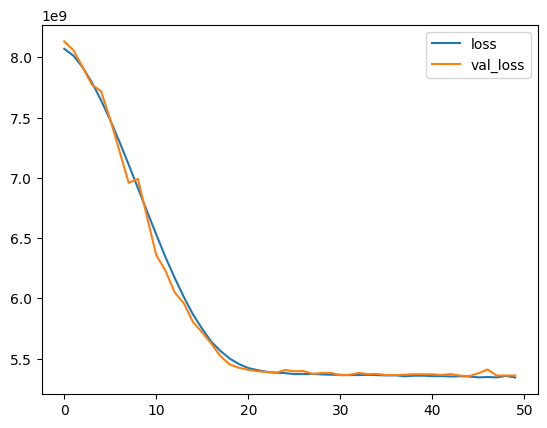

In [51]:
# Visualizing Training vs Validation Loss
loss_df = pd.DataFrame(losses.history)
loss_df.loc[:,['loss', 'val_loss']].plot()

The chart above shows the training and validation losses across the 50 epochs. There is a clear and significant continuous decrease in both losses from epochs 0 to 20. After that, the decrease in loss appears to taper and level off. Fortunately, the validation loss does not appear to be erratic, as it closely follows the curve of the training loss. Moreover, the model does not appear to overfit the data, as there are no significant increases in loss throughout the 50 epochs.  

<a id="0"></a>

<a href="#0" style="background-color:blue; color:white; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="0"></a>

<a id="0"></a>

<a href="#9" style="background-color:blue; color:white; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Next Section</a><a id="0"></a>

<a id="8"></a>

# **Making Predictions**

Objectives:
- Apply data cleaning process to 'test_df'
- Encode object columns
- Scale the 'test' data
- Make predictions on the 'test' data using the model
- Submit predictions as .csv

In [52]:
# Creating a copy of the 'test_df' dataset
test = test_df.copy()

In [53]:
# Removing the 'id' column from 'test' dataset
test = test.drop(columns=['id'])

In [54]:
# Cleaning 'test_df' with similar steps from Data Cleaning section

# Replacing 'fuel_type' with 'Gasoline' where 'fuel_type' is '–' and 'engine' is NOT '–'
test.loc[(test['fuel_type']=='–') & (test['engine']!='–'),'fuel_type'] = 'Gasoline' 

In [55]:
# Replacing 'not supported' with 'Gasoline' where 'engine' column contains 'Cylinder'
test.loc[(test['fuel_type']=='not supported') & (test['engine'].str.contains('Cylinder', case=False, na=False)), 'fuel_type'] = 'Gasoline'

# Replacing 'not supported' with 'Hybrid' where 'engine' columns contains 'Hydrogen'
test.loc[(test['fuel_type']=='not supported') & (test['engine'].str.contains('Hydrogen', case=False, na=False)), 'fuel_type'] = 'Hybrid'

# Assigning 'fuel_type' as 'E85 Flex Fuel' where 'engine' column contains 'Flex'
test.loc[(test['fuel_type'].isna()) & (test['engine'].str.contains("Flex", case=False, na=False)), 'fuel_type'] = 'E85 Flex Fuel'

# Assigning as 'Hybrid' where 'engine' contains 'Dual', 'Electric', 'Battery', 'kW', 'AH'
# Also where 'brand' contains 'Tesla' & where 'model' contains 'Hybrid'
test.loc[(test['fuel_type'].isna()) & (test['engine'].str.contains("Dual", case=False, na=False)), 'fuel_type'] = 'Hybrid'
test.loc[(test['fuel_type'].isna()) & (test['engine'].str.contains("Electric", case=False, na=False)), 'fuel_type'] = 'Hybrid'
test.loc[(test['fuel_type'].isna()) & (test['engine'].str.contains("Battery", case=False, na=False)), 'fuel_type'] = 'Hybrid'
test.loc[(test['fuel_type'].isna()) & (test['engine'].str.contains("kW", case=False, na=False)), 'fuel_type'] = 'Hybrid'
test.loc[(test['fuel_type'].isna()) & (test['engine'].str.contains("AH", case=False, na=False)), 'fuel_type'] = 'Hybrid'
test.loc[(test['fuel_type'].isna()) & (test['brand'].str.contains("Tesla", case=False, na=False)), 'fuel_type'] = 'Hybrid'
test.loc[(test['fuel_type'].isna()) & (test['model'].str.contains("Hybrid", case=False, na=False)), 'fuel_type'] = 'Hybrid'

# Assigning as 'Gasoline' where 'engine' contains 'GDI', 'PDI', 'OHV', 'MPFI', 'TFSI', 'DOHC', 'Gasoline'
test.loc[(test['fuel_type'].isna()) & (test['engine'].str.contains("GDI", case=False, na=False)), 'fuel_type'] = 'Gasoline'
test.loc[(test['fuel_type'].isna()) & (test['engine'].str.contains("PDI", case=False, na=False)), 'fuel_type'] = 'Gasoline'
test.loc[(test['fuel_type'].isna()) & (test['engine'].str.contains("OHV", case=False, na=False)), 'fuel_type'] = 'Gasoline'
test.loc[(test['fuel_type'].isna()) & (test['engine'].str.contains("MPFI", case=False, na=False)), 'fuel_type'] = 'Gasoline'
test.loc[(test['fuel_type'].isna()) & (test['engine'].str.contains("TFSI", case=False, na=False)), 'fuel_type'] = 'Gasoline'
test.loc[(test['fuel_type'].isna()) & (test['engine'].str.contains("DOHC", case=False, na=False)), 'fuel_type'] = 'Gasoline'
test.loc[(test['fuel_type'].isna()) & (test['engine'].str.contains("Gasoline", case=False, na=False)), 'fuel_type'] = 'Gasoline'
test.loc[(test['fuel_type'].isna()) & (test['model_year'] < 2020), 'fuel_type'] = 'Gasoline'

# Assigning as 'Diesel' where 'engine' contains 'Diesel'
test.loc[(test['fuel_type'].isna()) & (test['engine'].str.contains("Diesel", case=False, na=False)), 'fuel_type'] = 'Diesel'


In [56]:
# Assigning fuel types to remaining outliers
test['fuel_type'] = test['fuel_type'].fillna('Hybrid')

In [57]:
# Filling in missing values in 'accident' with 'None reported'
test['accident'] = test['accident'].fillna('None reported')

In [58]:
# Assigning 'Yes' to 'clean_title' column when the 'accident' column contains 'None'
test.loc[(test['clean_title'].isna()) & (test['accident'].str.contains('None', case=False, na=False)), 'clean_title'] = 'Yes'

In [59]:
# Filling in remaining missing values in 'clean_title' with 'No'
test['clean_title'] = test['clean_title'].fillna('No')

In [60]:
# Encoding object columns in 'test'
for col in cat_cols:
    if col in test.columns:
        test[col] = le.fit_transform(test[col])

In [61]:
# Verifying changes made to 'test'
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   brand         125690 non-null  int64
 1   model         125690 non-null  int64
 2   model_year    125690 non-null  int64
 3   milage        125690 non-null  int64
 4   fuel_type     125690 non-null  int64
 5   engine        125690 non-null  int64
 6   transmission  125690 non-null  int64
 7   ext_col       125690 non-null  int64
 8   int_col       125690 non-null  int64
 9   accident      125690 non-null  int64
 10  clean_title   125690 non-null  int64
dtypes: int64(11)
memory usage: 10.5 MB


In [62]:
# Applying scaler to 'test' data
test = scaler.fit_transform(test)

In [63]:
# Making predictions on 'test' data using the model, storing predictions as 'y_pred'
y_pred = model.predict(test)

3928/3928 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [64]:
# Loading in Kaggle's sample submission file
submission = pd.read_csv('/kaggle/input/playground-series-s4e9/sample_submission.csv')

In [65]:
# Applying predicted 'price' values to 'submission'
submission['price'] = y_pred
submission.head()

,id,price
0,188533,19286.257812
1,188534,80920.640625
2,188535,63099.968750
3,188536,20661.865234
4,188537,28717.164062


The 'submission' dataframe above appears to follow the correct structure, i.e. having two columns, 'id' and 'price'. Each entry contains a price which has been predicted by the model. It should be noted that the index is not needed. This will be removing in the next line of code. 

In [66]:
# Exporting 'submission' as a .csv for scoring
submission.to_csv('submission.csv', index=False)

<a id="0"></a>

<a href="#0" style="background-color:blue; color:white; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="0"></a>

<a id="0"></a>

<a href="#r" style="background-color:blue; color:white; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Next Section</a><a id="0"></a>

<a id="c"></a>

# **Conclusion**

The developed neural network appeared to be reasonably effective in predicting car prices. That is, the model yielded a RMSE score roughly halfway on the competition leaderboard. A chart showing the training and validation losses across each epoch showed that the model did not overfit the data. Both losses decreased significantly from epochs 0 to 20, then tapered off afterwards. Neither loss appeared to increase significantly across all 50 epochs, further suggesting that the model did not overfit. 

Final Model Parameters:
- Model: Sequential
- Layers:
    - Dense (128, 'relu')
    - Batch Normalization
    - Dropout (0.1)
    - Dense_1 (128, 'relu')
    - Batch Normalization_1
    - Dropot_1 (0.1)
    - Dense_2 (64, 'relu')
    - Batch Normalization_2 
    - Dense_3 (1, 'linear')
- Total Parameters: 27,649
    - Trainable Parameters: 27,009
    - Non-Trainable Parameters: 640
- Compiling:
    - Adam (learning rate: 0.001)
    - MSE
- Fitting:
    - Epochs: 50
    - Batch Size: 128
    
Possible Improvements:
- Adjusting learning rate
- Adding additional NN layers
- Experimenting with different activation functions
- Experimenting with different batch sizes
- Feature engineering


Thanks for checking out my project! I hope it was informative and that you maybe learned something! 

<a id="0"></a>

<a href="#0" style="background-color:blue; color:white; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="0"></a>

<a id="r"></a>

# **References**

- https://www.kaggle.com/competitions/playground-series-s4e9/overview
- https://www.kaggle.com/datasets/taeefnajib/used-car-price-prediction-dataset
- https://www.kaggle.com/code/wissamelias/car-price-guide-beginners-level-eda-nn
- https://www.kaggle.com/code/danishyousuf19/using-neural-networks-for-car-price-prediction/notebook
